In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("C:/Users/ACER/Downloads/student+performance/student/student-mat.csv", sep=';')


In [11]:
df['Result'] = df['G3'].apply(lambda x: 'Pass' if x >= 10 else 'Fail')

In [13]:
df.drop('G3', axis=1, inplace=True)

In [15]:
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [17]:
X = df.drop('Result', axis=1)
y = df['Result']

In [19]:
le_result = LabelEncoder()
y_encoded = le_result.fit_transform(y)

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42
)

In [25]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)

SVC()

In [27]:
y_pred = svm.predict(X_test)

In [31]:
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))

# FIXED: pass class names as strings
print("\n📊 Classification Report:\n", classification_report(
    y_test, y_pred, target_names=le_result.classes_.astype(str)))


🎯 Accuracy: 0.8319327731092437

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.61      0.74        46
           1       0.80      0.97      0.88        73

    accuracy                           0.83       119
   macro avg       0.87      0.79      0.81       119
weighted avg       0.85      0.83      0.82       119



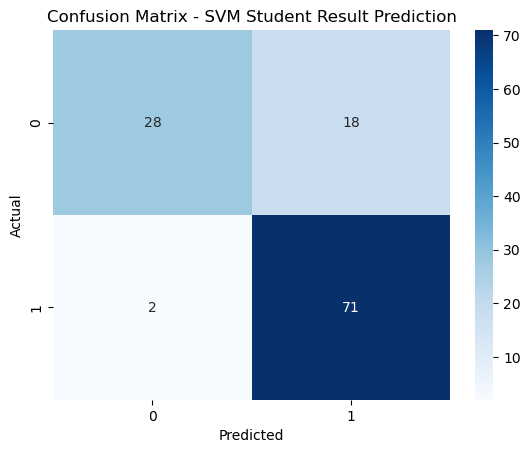

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le_result.classes_,
            yticklabels=le_result.classes_,
            cmap='Blues')
plt.title("Confusion Matrix - SVM Student Result Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()